<a href="https://colab.research.google.com/github/THEABHASHARMA/CASE-STUDIES/blob/main/CLT_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of CLT on real life dataset

Let's apply the central limit theorem to real distribution to see if the distribution of the sample means tends to follow normal distribution or not.

We'll take the height dataset, As we know it is already normally distributed, so let's take the sample means and see if they follow normal distribution.

In [1]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv

--2024-04-26 06:29:53--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 142.251.170.101, 142.251.170.139, 142.251.170.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.170.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2024-04-26 06:29:53--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.005s  

2024-04-26 06:29:54 (79

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
df_hw = pd.read_csv('weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#We are going to work on height column so let's store it in a different dataframe.
df_height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

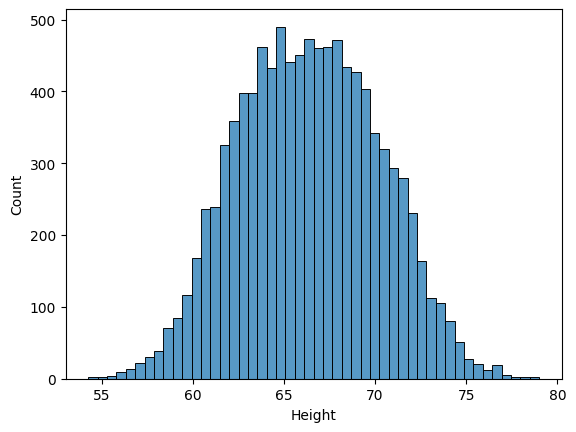

In [5]:
sns.histplot(df_height)

In [6]:
# mean of the entire population
mu = df_height.mean()
mu

66.36755975482124

In [7]:
sigma = df_height.std()
sigma

3.8475281207732293

We will now randomly select five samples and determine the average height of these samples

# Sample size = 5

In [8]:
df_height.sample(5)

7581    65.655525
4346    65.888951
6122    60.194897
5559    67.129880
7310    58.722219
Name: Height, dtype: float64

In [9]:
np.mean(df_height.sample(5))

67.57156113725502

**Observation**

We can notice that on running the above code, it is generating 5 different samples every time and the sample mean is also changing with that.

Let's repeat this process 10,000 times so we will get sample means of 10,000 unique samples (size = 5).

We will plot the distributions of these 10,000 sample means to see if they follow the normal distribution

In [11]:
sample_5 = [np.mean(df_height.sample(5))for i in range(1000)]

<Axes: ylabel='Count'>

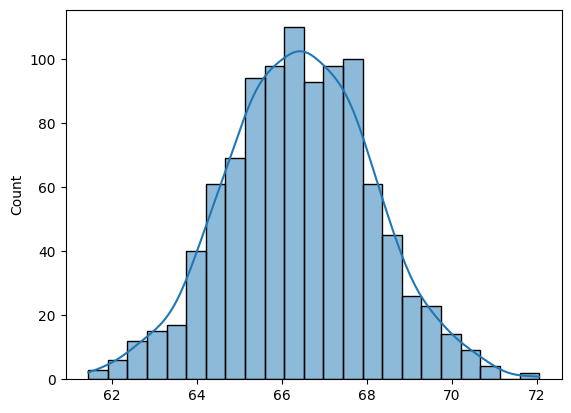

In [12]:
sns.histplot(sample_5, kde=True)

In [13]:
np.mean(sample_5)

66.4272687854704

In [14]:
np.std(sample_5)

1.7125748340095523

**Observation**

1. We can conclude that the distribution of those 10000 samples means is normally distributed and most of the values lies between 62 and 72.

2. There might be some cases where the samples contain only short peoples that is why we can see some values between 60 and 62

3. Similarly, there might be some cases where the samples contain only tall people that is why we can see some values between 70 and 72

# Sample size = 20

As we increase the size of the sample, the spread of data will be less.

This means, as we increase the size of the sample, the sample mean will come closer and closer to the population mean
Let's try this out.

Let's increase the sample size to 20.
We will again perform 10,00 iterations and plot the distributions of the sample means

In [15]:
sample_20 = [np.mean(df_height.sample(20)) for i in range(10000) ]

<Axes: ylabel='Count'>

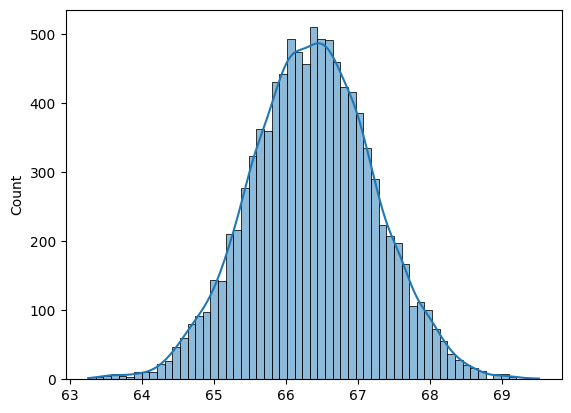

In [16]:
sns.histplot(sample_20, kde= True)

In [17]:
np.mean(sample_20)

66.3641101610415

In [18]:
np.std(sample_20)

0.855468702441649

**Observation**

# We can clearly see that as we increase the number of samples from 5 to 20, the sample means come closer to the actual mean and the standard deviation becomes less.

Previously the majority of the values were between 62 and 72. Now the spread of the data has decreased and values lie between 64 and 69

So we can assert that by increasing the size of the sample, the variability or SD of the sample distributions decreases and the sample mean tends to be much closer to the population mean.

# Comparison of Statistics

Let's compare the statistics of population data and sample data to observe some patterns

In [24]:
# population mean
mu = df_height.mean()

# population SD
sigma = df_height.std()

# mean of sample distributions having sample size = 5
mu_5 = np.mean(sample_5)

# SD of sample distributions having sample size = 5
sigma_5 = np.std(sample_5)

# mean of sample distributions having sample size = 20
mu_20 = np.mean(sample_20)

# SD of sample distributions having sample size = 20
sigma_20 = np.std(sample_20)

In [25]:
print(mu, mu_5, mu_20)
print(sigma, sigma_5, sigma_20)


66.36755975482124 66.4272687854704 66.3641101610415
3.8475281207732293 1.7125748340095523 0.855468702441649


# Observation

Here,

Population Statistics:

μ  = population mean
σ  = population standard deviation
Sample Statistics:

μ5  = mean of sample means (from samples of size 5)

σ5  = standard deviation of the sample means (from samples of size 5)

μ20  = mean of sample means (from samples of size 20)

σ20  = standard deviation of the sample means (from samples of size 20)



# Mean of the sampling distribution is equal to the mean of the population

# μ𝑥¯=μ
# As we increase the sample size, the SD of sample means decreases.

The SD of sampling distribution ( σ𝑥¯ ) is less than the population SD ( σ ).

σ>σ5>σ20


This aligns with the CLT, which states that the standard deviation of the sampling distribution ( σ𝑥¯ ) is the standard deviation of the population ( σ ) divided by the square root of the sample size i.e,

# known as standard Error.

# It indicates that how far my sample mean is from the actual mean.